In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml

boston = fetch_openml(name='boston', version=1, as_frame=True)

X = boston.data
y = boston.target

X = X.values.astype(float)
y = y.astype(float).values

df = pd.DataFrame(X, columns=boston.feature_names)
df['target'] = y

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Mean Squared Error: 24.291119474973705
R^2 Score: 0.6687594935356295


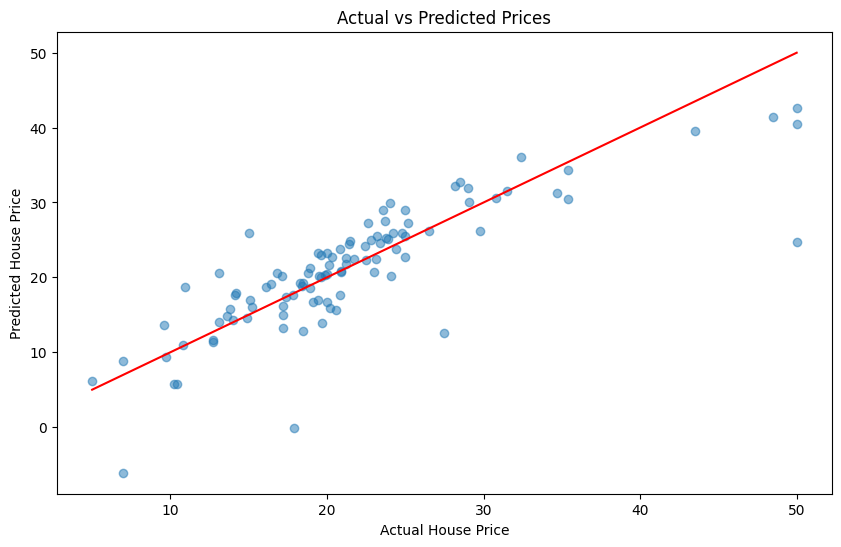

In [30]:
X= np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Xwt = np.c_[np.ones(X_train.shape[0]),X_train]
XtX = Xwt.T @ Xwt
XtY = Xwt.T @ y_train
betaHat = np.linalg.inv(XtX) @ XtY

y_pred = np.c_[np.ones(X_test.shape[0]), X_test] @ betaHat

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # y = x line
plt.show()


In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
sk_y_pred = model.predict(X_test)

print("Sklearn MSE:", mean_squared_error(y_test, sk_y_pred))
print("Sklearn R²:", r2_score(y_test, sk_y_pred))

Sklearn MSE: 24.291119474973552
Sklearn R²: 0.6687594935356316


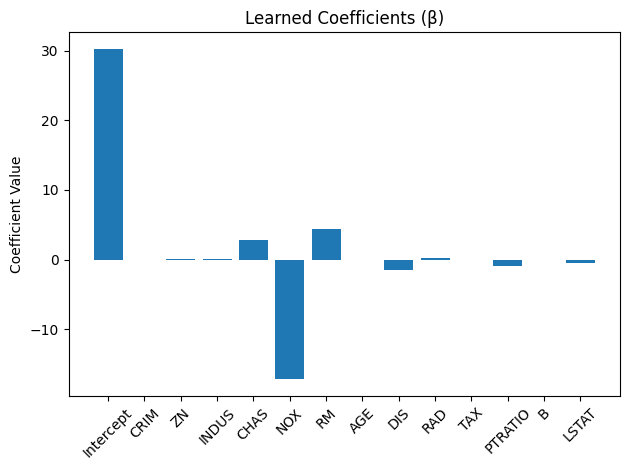

In [32]:

feature_names = ['Intercept'] + list(boston.feature_names)
plt.bar(range(len(betaHat)), betaHat)
plt.xticks(range(len(betaHat)), feature_names, rotation=45)
plt.ylabel("Coefficient Value")
plt.title("Learned Coefficients (β)")
plt.tight_layout()
plt.show()

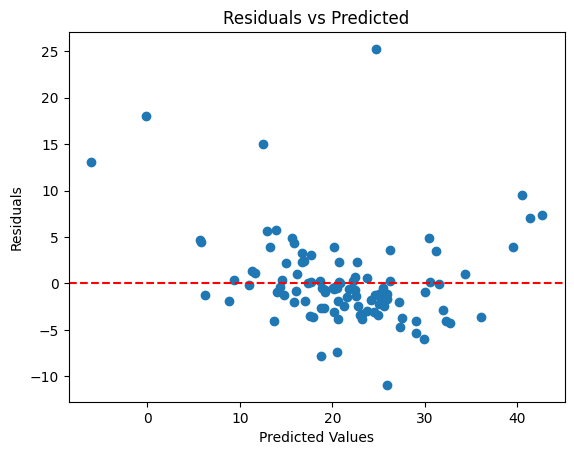

In [33]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()
